# Visualizing Crime Data

Hi, welcome to my assignment for the Probability and Statistics course at my college. I really just took this as an excuse to learn Pandas and the IPython Notebook in all its glory. So here goes!

# Importing required libraries

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas
import matplotlib

%matplotlib inline
%pylab inline

matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


Matplotlib has changed quite a bit from when I first used it in 2011. The new `ggplot` style, I daresay, makes the output plots quite sexy!

# Loading data from CSV files

In [2]:
india_women = pandas.read_csv('/home/radhika/PS/viz_project/datasets/india_women.csv')
india_kidnap = pandas.read_csv('/home/radhika/PS/viz_project/datasets/india_kidnap.csv', parse_dates=True, index_col='YEAR')
india_murder = pandas.read_csv('/home/radhika/PS/viz_project/datasets/india_murder.csv', parse_dates=True, index_col='YEAR')

In [3]:
us_violentcrime = pandas.read_csv('/home/radhika/PS/viz_project/datasets/us_violentcrime.csv', parse_dates=True, index_col='Year')

In [4]:
france_homicide = pandas.read_csv('/home/radhika/PS/viz_project/datasets/france_homicide.csv', parse_dates=True, index_col='Date')
france_assault = pandas.read_csv('/home/radhika/PS/viz_project/datasets/france_assault.csv', parse_dates=True, index_col='Date')
france_rape = pandas.read_csv('/home/radhika/PS/viz_project/datasets/france_rape.csv', parse_dates=True, index_col='Date')
france_kidnap = pandas.read_csv('/home/radhika/PS/viz_project/datasets/france_kidnap.csv', parse_dates=True, index_col='Date')

In [5]:
neth_homicide = pandas.read_csv('/home/radhika/PS/viz_project/datasets/neth_homicide.csv', parse_dates=True, index_col='Date')
neth_assault = pandas.read_csv('/home/radhika/PS/viz_project/datasets/neth_assault.csv', parse_dates=True, index_col='Date')
neth_rape = pandas.read_csv('/home/radhika/PS/viz_project/datasets/neth_rape.csv', parse_dates=True, index_col='Date')
neth_kidnap = pandas.read_csv('/home/radhika/PS/viz_project/datasets/neth_kidnap.csv', parse_dates=True, index_col='Date')

# Cleaning up and properly formatting data from CSV files for tabular use

Since I used data from various sources (thanks [data.gov.in](http://data.gov.in) and [Knoema](http://knoema.com)!), all of them were in different tabular formats and had to be parsed separately to be combined together. This was a bit irritating, but `pandas` made the process relatively painless.

I've shown the state of the modified table at every step for the sake of clarity.

In [6]:
india_kidnap.head()

,STATE/UT,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
YEAR,,,,,,,,,,,,,,,,,,
2001-01-01,Andhra Pradesh,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
2001-01-01,Andhra Pradesh,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2001-01-01,Andhra Pradesh,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2001-01-01,Andhra Pradesh,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
2001-01-01,Andhra Pradesh,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339


Purpose of Kidnapping: "For Camel Racing". Wut.

In [7]:
india_murder.head()

,STATE/UT,GENDER,Upto 10 years,10-15 years,15-18 years,18-30 years,30-50 years,Above 50 years,Total
YEAR,,,,,,,,,
2001-01-01,Andhra Pradesh,Male,35,59,88,827,952,215,2176
2001-01-01,Andhra Pradesh,Female,38,15,43,269,175,67,607
2001-01-01,Andhra Pradesh,Total,73,74,131,1096,1127,282,2783
2001-01-01,Arunachal Pradesh,Male,0,0,0,31,32,4,67
2001-01-01,Arunachal Pradesh,Female,0,0,0,10,4,2,16


In [8]:
state_murder = india_murder[india_murder['GENDER'] == 'Total']
state_murder = state_murder[[0, 8]]
state_murder.head()

,STATE/UT,Total
YEAR,,
2001-01-01,Andhra Pradesh,2783
2001-01-01,Arunachal Pradesh,83
2001-01-01,Assam,1356
2001-01-01,Bihar,3643
2001-01-01,Chhattisgarh,1657


In [9]:
state_kidnap = india_kidnap[india_kidnap['Pupose'] == 'Total']
state_kidnap = state_kidnap[[0, 17]]
india_kidnap = state_kidnap.groupby(level=0).sum()
india_kidnap

,Grand Total
YEAR,
2001-01-01,22996
2002-01-01,22173
2003-01-01,20021
2004-01-01,23309
2005-01-01,23133
2006-01-01,24292
2007-01-01,28030
2008-01-01,30595
2009-01-01,34304


In [10]:
india_murder = state_murder.groupby(level=0).sum()
india_murder

,Total
YEAR,
2001-01-01,38636
2002-01-01,38033
2003-01-01,33821
2004-01-01,34915
2005-01-01,34419
2006-01-01,33808
2007-01-01,33428
2008-01-01,33727
2009-01-01,33159


In [11]:
state_rape = india_women[india_women['CRIME HEAD'] == 'RAPE']
state_rape.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ANDHRA PRADESH,RAPE,1150,1340,1237,1443,1415,1360,1436,1531,1487,1761,1758,1664
1,ARUNACHAL PRADESH,RAPE,51,61,35,56,38,40,57,37,60,49,47,47
2,ASSAM,RAPE,928,1019,1188,1233,1406,1290,1477,1445,1644,1629,1470,1626
3,BIHAR,RAPE,1400,1304,1120,1157,1455,1451,1816,1464,1086,892,1185,1327
4,CHHATTISGARH,RAPE,1134,1214,1020,1144,1107,1211,1146,1108,1128,1198,1257,1214


In [12]:
india_rape = state_rape.loc[37][2:]
india_rape.index = india_murder.index
india_rape.columns = ['Total']
india_rape

YEAR
2001-01-01    20446
2002-01-01    21236
2003-01-01    19994
2004-01-01    22489
2005-01-01    23212
2006-01-01    23792
2007-01-01    25363
2008-01-01    25036
2009-01-01    25845
2010-01-01    27074
2011-01-01    28878
2012-01-01    31117
Name: 37, dtype: object

In [13]:
us_violentcrime.head()

,Population,Violent crime total,Murder and nonnegligent Manslaughter,Forcible rape,Robbery,Aggravated assault
Year,,,,,,
1960-01-01,179323175,288460,9110,17190,107840,154320
1961-01-01,182992000,289390,8740,17220,106670,156760
1962-01-01,185771000,301510,8530,17550,110860,164570
1963-01-01,188483000,316970,8640,17650,116470,174210
1964-01-01,191141000,364220,9360,21420,130390,203050


In [14]:
france_homicide.head()
neth_assault.head()

,location,variable,Unit,Value
Date,,,,
2003-01-01,Netherlands,"Assault at the national level, count",Number,53500
2004-01-01,Netherlands,"Assault at the national level, count",Number,55300
2005-01-01,Netherlands,"Assault at the national level, count",Number,67060
2006-01-01,Netherlands,"Assault at the national level, count",Number,69185
2007-01-01,Netherlands,"Assault at the national level, count",Number,71570


In [15]:
france_assault = france_assault[[3]]
france_homicide = france_homicide[[3]]
france_kidnap = france_kidnap[[3]]
france_rape = france_rape[[3]]

In [16]:
neth_assault = neth_assault[[3]]
neth_homicide = neth_homicide[[3]]
neth_kidnap = neth_kidnap[[3]]
neth_rape = neth_rape[[3]]

# Final merging of data and formation of tables

In [17]:
india_violentcrime = pandas.concat([india_murder, india_kidnap, india_rape], axis=1)
india_violentcrime.columns = ['Murder', 'Kidnapping and Abduction', 'Rape']
india_violentcrime

,Murder,Kidnapping and Abduction,Rape
YEAR,,,
2001-01-01,38636,22996,20446
2002-01-01,38033,22173,21236
2003-01-01,33821,20021,19994
2004-01-01,34915,23309,22489
2005-01-01,34419,23133,23212
2006-01-01,33808,24292,23792
2007-01-01,33428,28030,25363
2008-01-01,33727,30595,25036
2009-01-01,33159,34304,25845


In [18]:
neth_violentcrime = pandas.concat([neth_homicide, neth_assault, neth_kidnap, neth_rape], axis=1)
neth_violentcrime.columns = ['Homicide', 'Assault', 'Kidnapping and Abduction', 'Rape']
neth_violentcrime

,Homicide,Assault,Kidnapping and Abduction,Rape
Date,,,,
2000-01-01,180,NaN,NaN,NaN
2001-01-01,202,NaN,NaN,NaN
2002-01-01,195,NaN,NaN,NaN
2003-01-01,202,53500,NaN,1700
2004-01-01,191,55300,NaN,1800
2005-01-01,174,67060,910,2505
2006-01-01,128,69185,850,2405
2007-01-01,143,71570,780,2135
2008-01-01,150,69005,760,1945


In [19]:
france_violentcrime = pandas.concat([france_homicide, france_assault, france_kidnap, france_rape], axis=1)
france_violentcrime.columns = ['Homicide', 'Assault', 'Kidnapping and Abduction', 'Rape']
france_violentcrime

,Homicide,Assault,Kidnapping and Abduction,Rape
Date,,,,
2000-01-01,1051,NaN,NaN,NaN
2001-01-01,1047,NaN,NaN,NaN
2002-01-01,1119,NaN,NaN,NaN
2003-01-01,987,135003,2031,10408
2004-01-01,990,137679,2143,10506
2005-01-01,976,148651,2012,9993
2006-01-01,879,164359,2288,9784
2007-01-01,993,175886,2109,10132
2008-01-01,1021,187937,2074,10277


In [20]:
us_violentcrime['Violent crime total'] -= us_violentcrime['Robbery']
del us_violentcrime['Robbery']
del us_violentcrime['Population']
del us_violentcrime['Violent crime total']
us_violentcrime = us_violentcrime.loc['2000-01-01':]
us_violentcrime

,Murder and nonnegligent Manslaughter,Forcible rape,Aggravated assault
Year,,,
2000-01-01,15586,90178,911706
2001-01-01,16037,90863,909023
2002-01-01,16229,95235,891407
2003-01-01,16528,93883,859030
2004-01-01,16148,95089,847381
2005-01-01,16740,94347,862220
2006-01-01,17309,94472,874096
2007-01-01,17128,92160,866358
2008-01-01,16465,90750,843683


In [21]:
rape_stats = pandas.concat([us_violentcrime['Forcible rape'], india_rape, france_rape, neth_rape], axis=1)
rape_stats.columns = ['US', 'India', 'France', 'Netherlands']
rape_stats

,US,India,France,Netherlands
2000-01-01,90178,NaN,NaN,NaN
2001-01-01,90863,20446,NaN,NaN
2002-01-01,95235,21236,NaN,NaN
2003-01-01,93883,19994,10408,1700
2004-01-01,95089,22489,10506,1800
2005-01-01,94347,23212,9993,2505
2006-01-01,94472,23792,9784,2405
2007-01-01,92160,25363,10132,2135
2008-01-01,90750,25036,10277,1945
2009-01-01,89241,25845,9842,1920


In [22]:
homicide_stats = pandas.concat([us_violentcrime['Murder and nonnegligent Manslaughter'], india_murder, france_homicide, neth_homicide], axis=1)
homicide_stats.columns = ['US', 'India', 'France', 'Netherlands']
homicide_stats

,US,India,France,Netherlands
2000-01-01,15586,NaN,1051,180
2001-01-01,16037,38636,1047,202
2002-01-01,16229,38033,1119,195
2003-01-01,16528,33821,987,202
2004-01-01,16148,34915,990,191
2005-01-01,16740,34419,976,174
2006-01-01,17309,33808,879,128
2007-01-01,17128,33428,993,143
2008-01-01,16465,33727,1021,150
2009-01-01,15399,33159,819,154


In [23]:
assault_stats = pandas.concat([us_violentcrime['Aggravated assault'], france_assault, neth_assault], axis=1)
assault_stats.columns = ['US', 'France', 'Netherlands']
assault_stats

,US,France,Netherlands
2000-01-01,911706,NaN,NaN
2001-01-01,909023,NaN,NaN
2002-01-01,891407,NaN,NaN
2003-01-01,859030,135003,53500
2004-01-01,847381,137679,55300
2005-01-01,862220,148651,67060
2006-01-01,874096,164359,69185
2007-01-01,866358,175886,71570
2008-01-01,843683,187937,69005
2009-01-01,812514,193405,65690


In [24]:
kidnapping_stats = pandas.concat([india_kidnap, france_kidnap, neth_kidnap], axis=1)
kidnapping_stats.columns = ['India', 'France', 'Netherlands']
kidnapping_stats

,India,France,Netherlands
2001-01-01,22996,NaN,NaN
2002-01-01,22173,NaN,NaN
2003-01-01,20021,2031,NaN
2004-01-01,23309,2143,NaN
2005-01-01,23133,2012,910
2006-01-01,24292,2288,850
2007-01-01,28030,2109,780
2008-01-01,30595,2074,760
2009-01-01,34304,2085,625
2010-01-01,39148,2092,645


# Visualization and plotting of data

Yay for pretty plots!

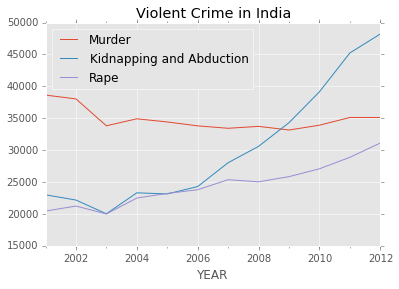

In [25]:
india_violentcrime.plot(kind='line', title='Violent Crime in India')

This was pretty much expected. It's interesting how the number of murders show a downward trend, but the number of kidnappings and rapes show a dramatic rise.

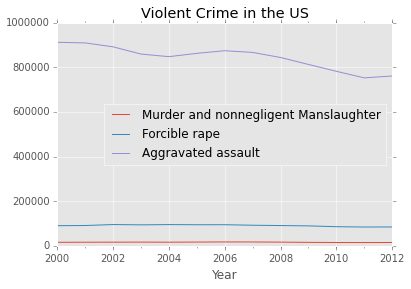

In [26]:
us_violentcrime.plot(kind='line', title='Violent Crime in the US')

Looking at the number of aggravated assaults, the Americans seem to be an angry race.

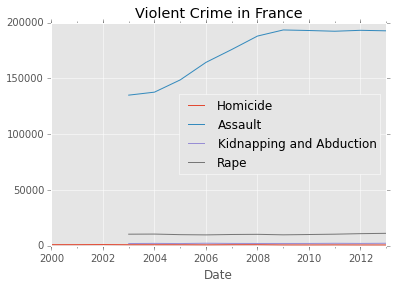

In [27]:
france_violentcrime.plot(kind='line', title='Violent Crime in France')

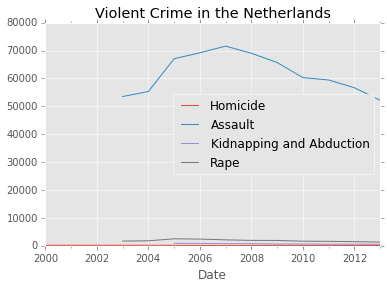

In [28]:
neth_violentcrime.plot(kind='line', title='Violent Crime in the Netherlands')

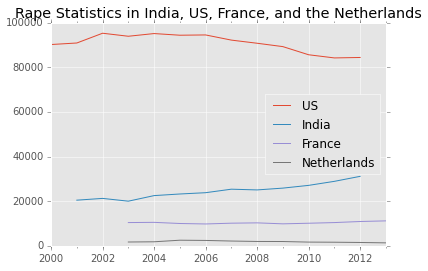

In [29]:
rape_stats.plot(kind='line', title='Rape Statistics in India, US, France, and the Netherlands')

Now this is interesting. Looking at the amount of attention garnered by India and its rape problem, one wouldn't have expected the United States to actually have a *considerably* higher number of rape cases reported. 'Rape cases reported' being the operative phrase of course. It's also interesting to see the steady decline in rapes in the US, and its rise in India. France and the Netherlands seem to be quite benign in this matter, considering how prostitution is legal in the Netherlands.

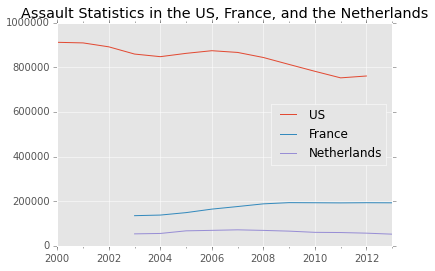

In [30]:
assault_stats.plot(kind='line', title='Assault Statistics in the US, France, and the Netherlands')

Again, Americans, get a grip on yourselves. On a side note, it's kind of unfortunate how I couldn't find any data on assault in India, although I suspect it would give the Americans a run for their money.

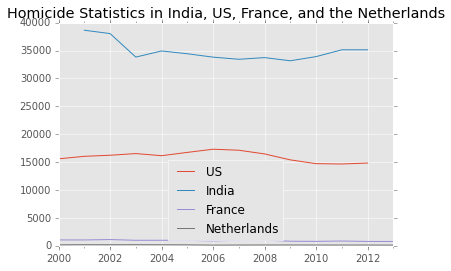

In [31]:
homicide_stats.plot(kind='line', title='Homicide Statistics in India, US, France, and the Netherlands')

Interesting again. Gun violence has attracted quite a bit of attention in the US, but turns out India surpasses the US by a considerable margin in terms of the number of homicides committed.

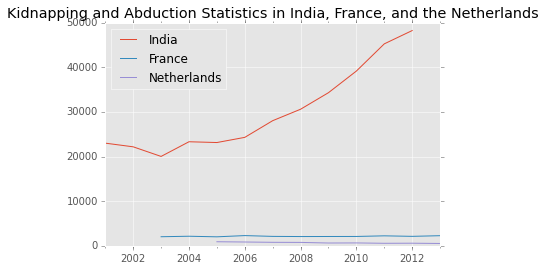

In [32]:
kidnapping_stats.plot(kind='line', title='Kidnapping and Abduction Statistics in India, France, and the Netherlands')